In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib as mpl
mpl.style.use('style.mcstyle')   # noqa
from matplotlib import pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from tqdm import tqdm
import h5py

from astropy.cosmology import Planck18
cosmo = Planck18

In [2]:
suitedir = '/anvil/scratch/x-mho1/cmass-ili/quijotelike/fastpm/L1000-N128'

dirlist = os.listdir(suitedir)
print(f'Number of sims: {len(dirlist)}')

a = f'{2/3:.6f}'
Pks = []
for lhid in tqdm(dirlist[::20]):
    diagpath = join(suitedir, lhid, 'diag', 'galaxies')
    diaglist = os.listdir(diagpath)

    for diag in diaglist:
        diagfile = join(diagpath, diag)
        with h5py.File(diagfile, 'r') as f:
            k = f[a]['Pk_k3D'][...]
            Pk = f[a]['Pk'][...]
            Pks.append(Pk)

Number of sims: 4000


100%|██████████| 200/200 [00:15<00:00, 13.12it/s]


In [41]:
suitedir = '/anvil/scratch/x-mho1/cmass-ili/quijotelike/pinocchio/L1000-N512'

dirlist = os.listdir(suitedir)
print(f'Number of sims: {len(dirlist)}')

a = f'{2/3:.6f}'
pPks = []
for lhid in tqdm(dirlist[::10]):
    diagpath = join(suitedir, lhid, 'diag', 'galaxies')
    diaglist = os.listdir(diagpath)

    for diag in diaglist:
        diagfile = join(diagpath, diag)
        with h5py.File(diagfile, 'r') as f:
            k = f[a]['Pk_k3D'][...]
            Pk = f[a]['Pk'][...]
            pPks.append(Pk)

Number of sims: 2000


100%|██████████| 200/200 [00:03<00:00, 57.57it/s]


In [50]:
suitedir = '/anvil/scratch/x-mho1/cmass-ili/quijote/nbody/L1000-N128'

dirlist = os.listdir(suitedir)
print(f'Number of sims: {len(dirlist)}')

a = f'{2/3:.6f}'
qPks = []
for lhid in tqdm(dirlist[::10]):
    diagpath = join(suitedir, lhid, 'diag', 'galaxies')
    diaglist = os.listdir(diagpath)

    for diag in diaglist:
        diagfile = join(diagpath, diag)
        with h5py.File(diagfile, 'r') as f:
            k = f[a]['Pk_k3D'][...]
            Pk = f[a]['Pk'][...]
            qPks.append(Pk)

Number of sims: 2000


100%|██████████| 200/200 [00:17<00:00, 11.44it/s]


In [51]:
Pks, pPks, qPks = np.array(Pks), np.array(pPks), np.array(qPks)

0
1
2


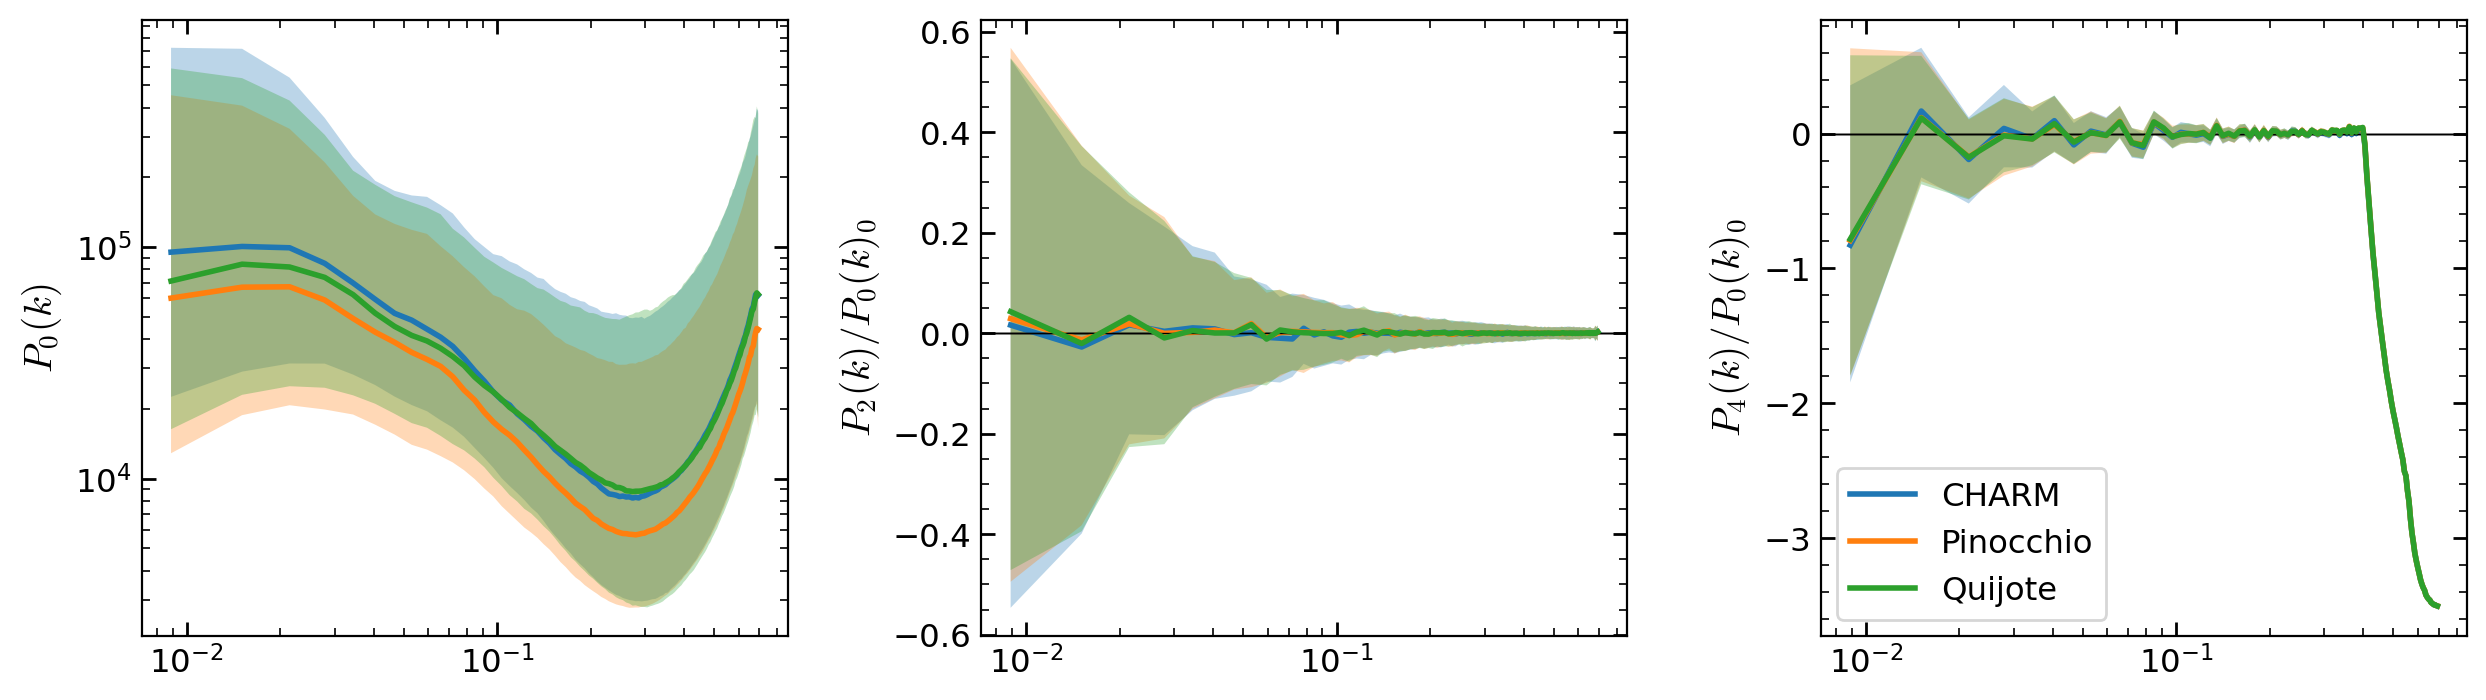

In [52]:
Npoles = 3
f, axs = plt.subplots(1, Npoles, figsize=(15, 4), gridspec_kw=dict(wspace=0.3))
for j, p in enumerate([Pks, pPks, qPks]):
    print(j)
    for i in range(Npoles):
        ax = axs[i]
        x = k
        if i == 0:
            ax.loglog()
            y = np.median(p[..., i], axis=0)
            yperc = np.percentile(p[..., i], [16, 84], axis=0)
            ax.set_ylabel(r'$P_0(k)$')
        else:
            ax.semilogx()
            ax.axhline(0, color='k', lw=0.5)
            y = p[..., i] / p[..., 0]
            yperc = np.percentile(y, [16, 84], axis=0)
            y = np.median(y, axis=0)
            ax.set_ylabel(f'$P_{2*i}(k)/P_0(k)_0$')
        if j == 0:
            ax.plot(x, y, label='CHARM')
        elif j == 1:
            ax.plot(x, y, label='Pinocchio')
        else:
            ax.plot(x, y, label='Quijote')
        ax.fill_between(x, yperc[0], yperc[1], alpha=0.3)
ax.legend()

## Scratch

In [11]:
filepath = '/anvil/scratch/x-mho1/cmass-ili/quijote/nbody/L1000-N128/17/diag/galaxies/hod00171.h5'
filepath = '/anvil/scratch/x-mho1/cmass-ili/quijote/nbody_leauthaud/L1000-N128/88/diag/galaxies/hod00881.h5'
out = {}
a = f'{2/3:.6f}'
with h5py.File(filepath, 'r') as f:
    for k, v in f[a].items():
        out[k] = v[...]

# t0 = (out['Bk_k123'])
t1 = (out['Bk_k123'])

In [16]:
for i in range(t0.shape[1]):
    if t0[:, i] not in t1.T:
        print(f'{i} not in t1')

In [ ]:
t0[:, 0] in t1.T

True